### Gausian Distribution
---

It is helpful when data is Gaussian or when we assume a Gaussian distribution for calculating statistics. This is because the Gaussian distribution is very well understood. So much so that large parts of the field of statistics are dedicated to methods for this distribution.

The following code generates and plots the 'normal' distribution

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm

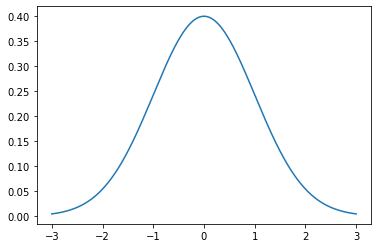

In [3]:
x_axis = np.arange(-3, 3, 0.001)
y_axis = norm.pdf(x_axis, 0, 1)
plt.plot(x_axis, y_axis);

- **Data Sample**: A subset of observations from a group.
- **Data Population**: All possible observations from a group.

Generate some test data. Then scale these numbers to a Gaussian of our choosing. 

Make this consistent by adding the desired mean (50) and multiplying by the standard deviation (5). 

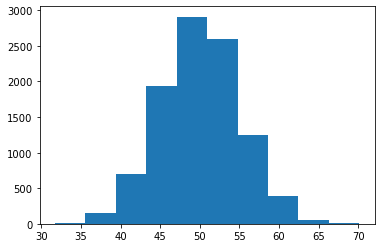

In [5]:
np.random.seed(1)
data = 5 * np.random.randn(10000) + 50
plt.hist(data);

We can almost see the Gaussian shape to the data, but it is blocky. 

This highlights an important point...

Sometimes, the data will not be a perfect Gaussian, but it will have a Gaussian-like distribution. 

Often, we can treat it as Gaussian and use all of the same statistical tools and get reliable results.

Changing the amount of bins make it appear more guassion (for example)

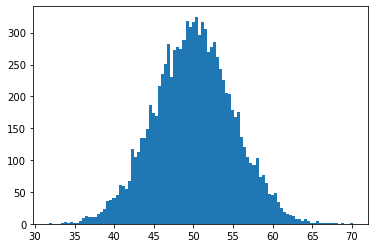

In [7]:
pyplot.hist(data, bins=100);

We created this data directly from the guassian but we can still see an element of 'noise'

#### Central Tendancy
---

The central tendency of a distribution refers to the middle or typical value in the distribution. 

The most common or most likely value. 
 
The mean of a sample is calculated as the sum of the observations divided by the total number of observations in the sample.

$$ \text{mean(x)} = \frac{1}{n} \sum_{i=1}^n x_i$$

In [8]:
mean = np.mean(data)
mean

50.04886328349552